In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/Drug Classification/drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


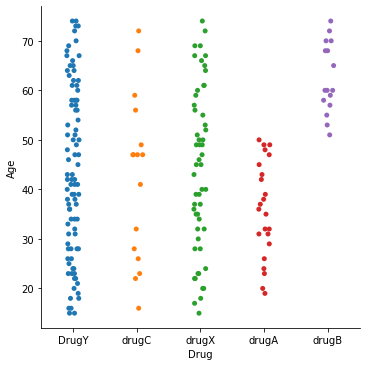

In [6]:
sns.catplot('Drug', 'Age', data = df)

In [7]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [8]:
sex_drug = df.groupby('Sex').Drug.value_counts()
sex_drug

Sex  Drug 
F    DrugY    47
     drugX    27
     drugA     9
     drugC     7
     drugB     6
M    DrugY    44
     drugX    27
     drugA    14
     drugB    10
     drugC     9
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug'>

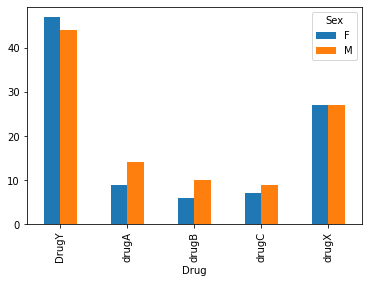

In [9]:
sex_drug.unstack(level = 0).plot(kind = 'bar', subplots = False)

In [10]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
tab = pd.crosstab(df.BP, df.Drug)
print(tab)

Drug    DrugY  drugA  drugB  drugC  drugX
BP                                       
HIGH       38     23     16      0      0
LOW        30      0      0     16     18
NORMAL     23      0      0      0     36


Text(0, 0.5, 'Percentage')

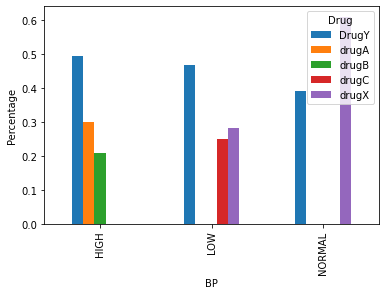

In [12]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('BP')
plt.ylabel('Percentage')

In [13]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [14]:
tab = pd.crosstab(df.Cholesterol, df.Drug)
print(tab)

Drug         DrugY  drugA  drugB  drugC  drugX
Cholesterol                                   
HIGH            47     12      8     16     20
NORMAL          44     11      8      0     34


<AxesSubplot:xlabel='Cholesterol'>

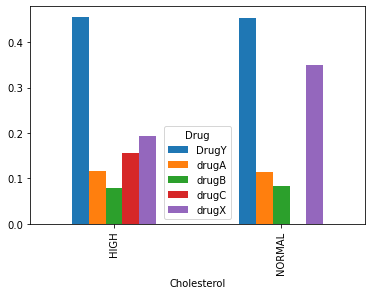

In [15]:
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = False)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


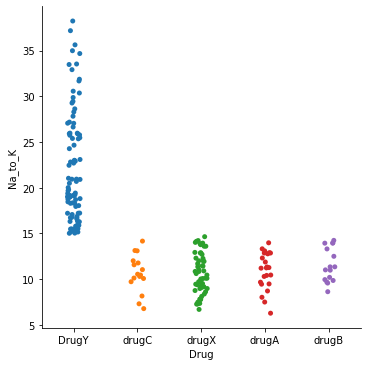

In [16]:
sns.catplot('Drug', 'Na_to_K', data=df)

In [17]:
df["Sex"] = df["Sex"].map({"M": 0, "F":1})
df["BP"] = df["BP"].map({"HIGH" : 3, "NORMAL" : 2, "LOW": 1})
df["Cholesterol"] = df["Cholesterol"].map({"HIGH": 1, "NORMAL" : 0})
df["Drug"] = df["Drug"].map({"DrugY": 0, "drugC": 1, "drugX": 2, "drugA":3, "drugB":4})

In [18]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,1,25.355,0
1,47,0,1,1,13.093,1
2,47,0,1,1,10.114,1
3,28,1,2,1,7.798,2
4,61,1,1,1,18.043,0


<AxesSubplot:>

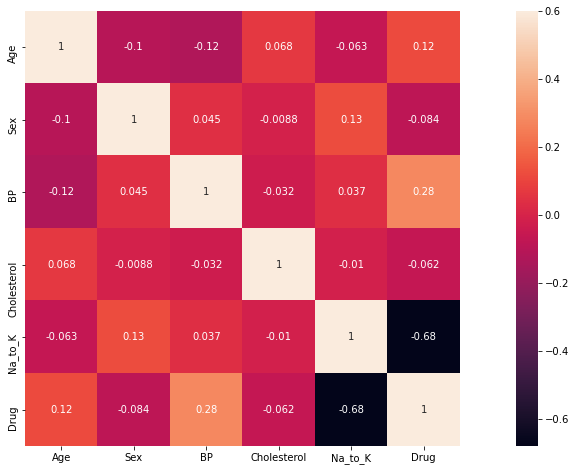

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

In [20]:
df.drop('Sex', axis=1, inplace=True)

In [21]:
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,3,1,25.355,0
1,47,1,1,13.093,1
2,47,1,1,10.114,1
3,28,2,1,7.798,2
4,61,1,1,18.043,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

import matplotlib
import matplotlib.image as mpimg

In [23]:
values = df.values

In [24]:
X, y = values[:, :-1], values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 17)

In [25]:
X_train.shape

(140, 4)

In [26]:
X_test.shape

(60, 4)

In [27]:
y_train.shape

(140,)

In [28]:
y_test.shape

(60,)

In [29]:
#Random Forest

In [30]:
rfc = RandomForestClassifier(n_estimators = 9, criterion='entropy', random_state = 12)

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=9, random_state=12)

In [31]:
pred_rfc = rfc.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, pred_rfc)

0.9833333333333333

In [33]:
#Decision Tree

In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dtc = dtc.predict(X_test)

In [36]:
metrics.accuracy_score(y_test,pred_dtc)

0.9666666666666667

In [37]:
#KNearestNeighbors

In [38]:
k = 16
scores = []
for k in range(1,k):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, pred_knn))
    
scores    

[0.5833333333333334,
 0.5666666666666667,
 0.5666666666666667,
 0.6166666666666667,
 0.5666666666666667,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6333333333333333,
 0.6666666666666666,
 0.65,
 0.65,
 0.65,
 0.6,
 0.5833333333333334]